<a href="https://colab.research.google.com/github/alisonsoong/NASA-SEES-Internship-2021/blob/main/EP_SEES_6_Velocity_Dispersion_Activity_Soong_Alison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alison Soong, EP, Emergency Preparedness
CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2021 SEES.  

### The last Colab Jupyter notebook of Lesson 2 - Python coding. 

For intermediate & advanced certificates, generate and share dispersion map files (PNG file output from matplotlib) in the appropriate Basecamp project folder. 

For advanced certificates, also generate histogram PNG files.

Neither activity required for basic certificate - only quiz completion.

In this activity, you are going to be making dispersion maps of Andromeda for 3 different types of stars: 
* Main Sequence (MS) stars, 
* Red Giant Branch (RGB) stars, and 
* Asymptotic Giant Branch (AGB) stars. 

We want to understand what these three maps tell us about the history of the Andromeda galaxy. 

*Yikes! What are these different kinds of stars? You might want to revisit the PyaR astronomy lecture videos and/or the [Stellar Evolution](https://www.youtube.com/watch?v=hbF_ELJ0Ues&feature=youtu.be) lecture from the Beyond page of SEES Lesson 1 Module 4.*

OK, back to our notebook. As usual, begin by running the first cell to import all necessary functions from *numpy* and *matplotlib*. You will also need to read in catalog text files and output plot graphics, so the *files* package needs to be imported.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import files

Here, we are introducing a new version of a function named *show_map*. You may recognize the function name from Notebook 5's activity about simulated disks but the parameters are different in this notebook. Run the below cell. You do not need to make any edits here.

In [ ]:
def show_map(xi, eta, quantity, label, fileName):
    ax = plt.axes(aspect = 'equal')
    ax.set_xlabel('xi (kpc)')
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Dispersion of Real Data')
    tt = ax.scatter(xi, eta, c = quantity, edgecolors = 'none', s = 2, vmin=40., vmax=160., cmap='rainbow')
    ax.set_xlim(1, 0)
    plt.colorbar(tt, label='Velocity Dispersion (km/s)')
    plt.text(0.9, -0.1, 'Alison Soong')
    plt.savefig(fileName)
    files.download(fileName)

This next function is where we are calculating the dispersion. Fill in the incomplete lines of code below. To search for math help in python, Google *numpy* followed by the thing you want to do. 

Experiment and wrestle with the code. If you truly get stuck, post a question on the **Basecamp Campfire** chat.

In [ ]:
def get_dispersion(x, z, v, circleSize=300./3600.):
    #initialize dispersion to all zeros
    dispersion = np.zeros(len(x))

    #Loop over all items in list
    for i in range(len(x)):
        #get coordinates of the item of interest
        thisX = x[i]
        thisZ = z[i]

        #calculate array of distances to this star
        dist = np.sqrt((x-thisX)**2 + (z-thisZ)**2)
        
        #pick out stars that are closer than circleSize to the star
        keep = dist < circleSize

        #calculate the velocity dispersion of those stars; assign to the ith element
        #of the array "dispersion"
        dispersion[i] = np.std(v[keep])
        
    return dispersion

The following lines of code are going to call the above two functions to generate the plots we are interested in. It is going to read in the catalogs that you created in the first activity (the **CMD activity** in notebook 3). If you do not have copies of these catalogs in your *data* folder, rerun notebook 3. If you get stuck, post a question on the **Basecamp Campfire** chat.


### Experimenting with parameters
After you've generated your first figure, play with the parameter "circleSize" when you call the get_dispersion function. 

What happens when you make *circleSize = 100./3600.*? The range of stars that show up is larger. More of the "extremes" show up, such as dark purple (40 km/s) and bright red (160 km/s) which represent the two ends/extremes.

What about *3600./3600.*? A very narrow range of stars show up. Only stars that are around 100 km/s show up (nothing shows up on either extreme).

Try to explain the differences between the two plots: See above

Change the value in the code statement to *circleSize=300./3600.* before you continue.

**REMEMBER!** The *show_map* function triggers the download of a png file that has the same name as the png name hardcoded in the show_map() statement. Look for the resulting png file in your Downloads folder.

Saving MScatalog.txt to MScatalog.txt
User uploaded file "MScatalog.txt"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

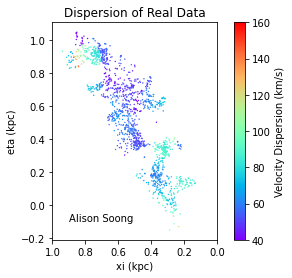

In [ ]:
cat_uploaded = files.upload()

for fn in cat_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read data
xi, eta, v = np.loadtxt('MScatalog.txt', unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
ms_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map
show_map(xi, eta, ms_sigma, 'Velocity dispersion (km/s)', 'MS_dispersion_map.png')
#show_map(xi, eta, ms_sigma, 'Velocity dispersion (km/s)', 'testing.png')

Saving AGBcatalog.txt to AGBcatalog.txt
User uploaded file "AGBcatalog.txt"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

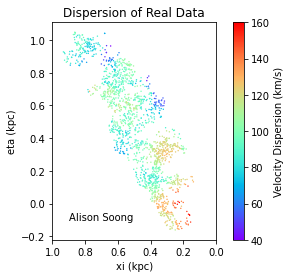

In [ ]:
#Fill in your code for the AGB stars here! 
cat_uploaded = files.upload()

for fn in cat_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read data
xi, eta, v = np.loadtxt('AGBcatalog.txt', unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
agb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map
show_map(xi, eta, agb_sigma, 'Velocity dispersion (km/s)', 'AGB_dispersion_map.png')

Saving RGBcatalog.txt to RGBcatalog.txt
User uploaded file "RGBcatalog.txt"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

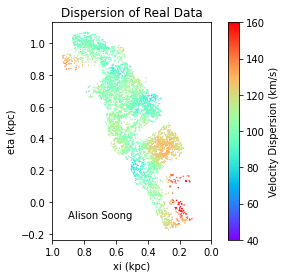

In [ ]:
#Fill in your code for the RGB stars here!
cat_uploaded = files.upload()

for fn in cat_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read data
xi, eta, v = np.loadtxt('RGBcatalog.txt', unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
rgb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map
show_map(xi, eta, rgb_sigma, 'Velocity dispersion (km/s)', 'RGB_dispersion_map.png')

After you’ve made all 3 maps, open up all 3 plots together (they are saved in your plots folder). Look at them next to each other. What do you observe about these 3 maps? What do they have in common, and how are they different?


Commonalities: All of them show a range of velocity dispersion. They either show the lower extreme, the higher extreme, or in the case of the AGB stars, a little bit of both!

Differences: The amount of data that is shown (so the number of data points/stars), and the ranges of colors (or velocity dispersions) shown. MS stars tended to be in the lower ranges, AGB tended to be in a larger range that reached both extremes, and RGB tended to be in the middle to upper ranges.

# Preparing for Intermediate Level Certificates
Modify your code for making the MS, AGB and RGB star plots so that the dispersion_map.png files identify your team code and your name as well as the star type. **BONUS!!** Can you modify the *show_map* function to also display your name on the plot?

Your png filename should be: *teamcode_startype*_dispersion_map_*LastName_FirstName*.png

where:
*   teamcode = your two character team code,
*   startype = MS, AGB or RGB,
*   LastName = your last name, and
*   FirstName = your first or given name.   

Your graphics files are ready for upload to the designated Intermediate Certificate folder! If you want to attempt the Advanced Level assignment, read on.

Saving MScatalog.txt to MScatalog (1).txt
User uploaded file "MScatalog.txt"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

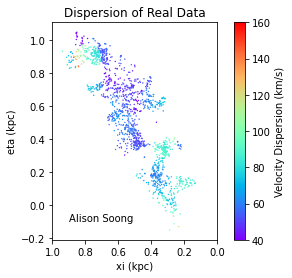

In [ ]:
# intermediate level
cat_uploaded = files.upload()

for fn in cat_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read data
xi, eta, v = np.loadtxt('MScatalog.txt', unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
ms_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map
show_map(xi, eta, ms_sigma, 'Velocity dispersion (km/s)', 'EP_MS_dispersion_map_Soong_Alison.png')

Saving AGBcatalog.txt to AGBcatalog (1).txt
User uploaded file "AGBcatalog.txt"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

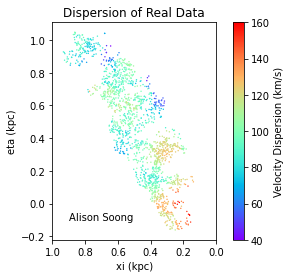

In [ ]:
# intermediate level
cat_uploaded = files.upload()

for fn in cat_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read data
xi, eta, v = np.loadtxt('AGBcatalog.txt', unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
agb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map
show_map(xi, eta, agb_sigma, 'Velocity dispersion (km/s)', 'EP_AGB_dispersion_map_Soong_Alison.png')

Saving RGBcatalog.txt to RGBcatalog (1).txt
User uploaded file "RGBcatalog.txt"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

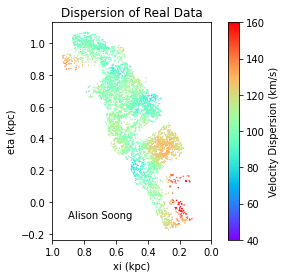

In [ ]:
# intermediate level
cat_uploaded = files.upload()

for fn in cat_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))

#Read data
xi, eta, v = np.loadtxt('RGBcatalog.txt', unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
rgb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map
show_map(xi, eta, rgb_sigma, 'Velocity dispersion (km/s)', 'EP_RGB_dispersion_map_Soong_Alison.png')

# Preparing for your Advanced Level Certificate

Now, on to the your last activity in this notebook. Your final assignment is to plot histograms for the velocity dispersions of the 3 types of stars. If you aren’t sure what a histogram is, begin by Googling that! **Hint:** to search for plotting help in python, Google “matplotlib” followed by the thing you want to do (for example, if I wanted to make a plot of a line, I would Google *matplotlib plot line*. 

Try to figure this out on your own first. Then ask each other for help. Finally, the notebook 6 video tutorial holds some important clues. Your histograms will become a part of this notebook.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

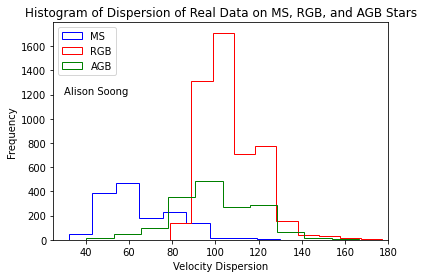

In [ ]:
#Put your histogram plotting code here! Be sure to run the code before submission.
ax = plt.axes()
ax.set_xlabel('Velocity Dispersion')
ax.set_ylabel('Frequency')
ax.set_xlim(25, 180)
ax.set_title('Histogram of Dispersion of Real Data on MS, RGB, and AGB Stars')
#print(len(rgb_sigma), len(ms_sigma), len(agb_sigma))
plt.hist(ms_sigma, color = 'blue', histtype = 'step', label = 'MS')
plt.hist(rgb_sigma, color = 'red', histtype = 'step', label = 'RGB')
plt.hist(agb_sigma, color = 'green', histtype = 'step', label = 'AGB')
plt.text(30, 1200, 'Alison Soong')
plt.legend()


# ax = plt.axes(aspect = 'equal')
#     ax.set_xlabel('xi (kpc)')
#     ax.set_ylabel('eta (kpc)')
#     ax.set_title('Dispersion of Real Data')
#     tt = ax.scatter(xi, eta, c = quantity, edgecolors = 'none', s = 2, vmin=40., vmax=160., cmap='rainbow')
#     ax.set_xlim(1, 0)
#     plt.colorbar(tt, label='Velocity Dispersion (km/s)')
#     plt.text(0.9, -0.1, 'Alison Soong')
#     plt.savefig(fileName)
#     files.download(fileName)


fileName = 'EP_histogram_Soong_Alison.png'
plt.gcf()
plt.savefig(fileName)
files.download(fileName)
plt.show()

### Code Block required for Advanced Certificate

Finally, compute the median velocity dispersion for each of the 3 age groups. Don't be afraid to use Google!

In [ ]:
#Compute and print the median values here! 
print('The mean value of MS stars is', np.sum(ms_sigma)/len(ms_sigma))
print('The mean value of RGB stars is', np.sum(rgb_sigma)/len(rgb_sigma))
print('The mean value of AGB stars is', np.sum(agb_sigma)/len(agb_sigma))

The mean value of MS stars is 65.23077476108917
The mean value of RGB stars is 106.95235802864148
The mean value of AGB stars is 100.133223383077


### Response required for Advanced Certificate
*Do your median values and histograms agree with your interpretation of the 3 maps?* 

**Write your thoughts here.**
It does! The results that I got are: the mean value of MS stars is 65.23077476108917, the mean value of RGB stars is 106.95235802864148, and the mean value of AGB stars is 100.133223383077. From looking at my histogram, all of these values agree with what I see as the means for all three sets of data in the histogram; I would expect around 60 km/s as the mean value for MS stars, around 100 km/s for RGB stars, and around 100 km/s for AGB stars as well.

## Submitting notebook for the Advanced Level Certificate
When you have successfully completed the code that plots the requested maps and histograms, you can prepare this notebook for submission. Also be sure to provide requested responses in the appropriate text cells. Your answers demonstrate that you've attempted to interpret the science data. They will not be scored.

Overwrite the title text in the **CREDIT text block** at the top of the notebook. Write **your full name**, **your team code**, and **your specific team name** in the text block instead.

Make sure that your saved notebook shows your output by running all code cells.

Copy or rename notebook 6 in this way:  
* *team code* SEES 6-Velocity Dispersion Activity *last name*_*first name*.ipynb. 

1.   *team code* is your 2 character SEES team code
2.   *last name* is your last name, and
3.   *first name* is your first name

For example, a team mentor for SEES would name her notebook *EP_SEES 6-Velocity Dispersion Activity_Howard_Teresa.ipynb*.

Follow the directions in Basecamp to submit your notebook. 
